In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/lucho/color-sketch/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
from shutil import copyfile
import cv2
import numpy as np
import pandas as pd
from datetime import datetime
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Input, Add, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

## Predict Image with h5 model

In [0]:
# Load model
model = load_model('model/color_sketch_model.h5', compile=False)

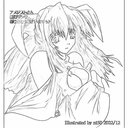

In [7]:
# Load image
img = load_img('images/sketch/0006/21006.png')
img_array = img_to_array(img)
img_array = (img_array - 127.5) / 127.5
img_array = np.expand_dims(img_array, axis=0)

img

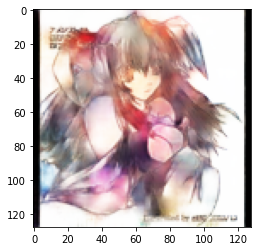

In [8]:
# Predict image
pred = model.predict(img_array)
pred = ((pred[0] + 1)/2.0)*255.0
pred = array_to_img(pred)
plt.imshow(pred)
plt.show()